In [12]:
# u ovom primeru radimo PCA - principal component analysis za iris

import pandas as pd

from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import numpy as np

from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('../iris.csv')
df.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
X = df.drop('Species', axis=1)
y = df['Species']

In [4]:
# ne pravimo nikakav model nego hocemo da vizuelizujemo. iris ima ukupno 5 atributa, a posto ne mozemo da 
# crtamo u 5 dimenzija vec najvise u 3, treba nekako da ih redukujemo

# ne mroamo nuzno uvek raditi normalizaciju /standardizaciju. Npr ako su podaci vec na nekoj slicnoj skali
# onda ne moramo, ali mi ovde radimo skaliranje
scaler = StandardScaler()

feature_names = X.columns.tolist()

# napravimo dataframe da bi bilo preglednije
X = pd.DataFrame(scaler.fit_transform(X), columns=feature_names)
X.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [5]:
# PCA se korsiti identicno kao sve druge transforacije iz sklearn
pca = PCA()

In [6]:
# NOTE: iako postoji fit_transform, ali to izgleda nesto ne radi kako treba pa je prepruka da razdvojimo
# fit i transform pozive
pca.fit(X)
X = pca.transform(X)

# napravimo dataframe da bi bilo preglednije, pca_names ce biti neki novi atributi koji se naprave
# koliko ih ima mozemo da vidimo sa n_compoents_ 
pca_names = [f'pca_{i}' for i in range(pca.n_components_)]
#print(pca_names)

X = pd.DataFrame(X, columns=pca_names)
X.head()

,pca_0,pca_1,pca_2,pca_3
0,-2.264703,0.480027,-0.127706,-0.024168
1,-2.080961,-0.674134,-0.234609,-0.103007
2,-2.364229,-0.341908,0.044201,-0.028377
3,-2.299384,-0.597395,0.091290,0.065956
4,-2.389842,0.646835,0.015738,0.035923


[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]
 [-0.71956635  0.24438178  0.14212637  0.63427274]
 [-0.26128628  0.12350962  0.80144925 -0.52359713]]

[0.72962445 0.22850762 0.03668922 0.00517871]


<BarContainer object of 4 artists>

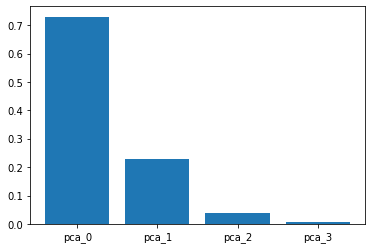

In [16]:
# pca nove atribute pravi kao neku linearnu kombinaciju postojeciha tributa. Koeficijente te linearne kombinacijeabs
# mozemo da vidimo sa components_
print(pca.components_)

print()

# udeo objasnjene varijanse za svaki novodobijeni atribut kaze koliko on variajnse celog skupa pokriva.
# Npr, vidimo da je prvi broj 0.72, to znaci da ako izbacimo sve atribute sem pca_0, samo taj prvi atribut
# je dovoljan da se predstavi oko 72% razliciosti u nasim podacima, tj izgubili bismo oko 0.28 varijanse
# slicno za sledeci broj. za pca_1 je 0.22, znaci on predstavlja oko 22% ukupne varijanse, tj izgubili bismo 
# oko 78% ako bismo izbacili sve atribute sem njega
# kada se posmatra zajedno, vidimo da su prva+druga komponenta objasnile oko 0.94 tj oko 94% ukupne 
# varijanse u skupu, sto znaci da mozemo slobodno da ignorisemo preostala 2 atributa pca_2 i pca_3
print(pca.explained_variance_ratio_)
# mozemo i da ih vizuelizujemo na bar plotu koliko koji ucestvuje
plt.bar(pca_names, pca.explained_variance_ratio_)

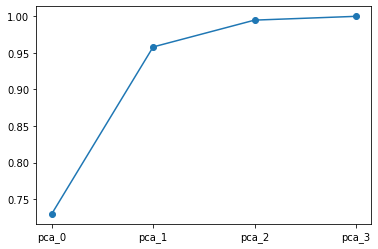

In [18]:
# a evo npr kako bi vizuelizovali kako se kumulativno povecava objasnjen deo varijanse podataka
# vidimo kada saberemo prva dva dobijamo vec oko 95% 
plt.plot(pca_names, np.cumsum(pca.explained_variance_ratio_), marker = 'o')

['setosa' 'versicolor' 'virginica']


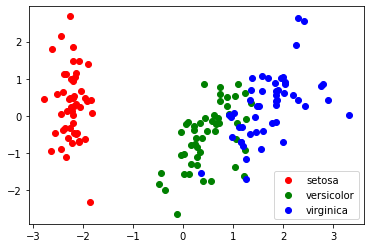

In [36]:
# primetimo da smo hteli da redukujemo broj atributa, ali fit i transform su nam sada dali isto 4 atributa 
# tj nije se redukovao njihov broj, nas nista ne sprecava da pri iscrtavanju samo korsitimo onoliko 
# koliko nam treba alternativno, mogli smo pri konstrukciji PCA() da damo opcioni argument n_components= nesto
# to moze da se korsiti na 2 nacina. Ako je to nesto integer, onda PCA zadrzava tacno toliko atributa koje
# napravi, a ako je to nesto float, onda PCA zadrzava onoliko atributa koji pokrivaju toliki % varijasne skupa

# hocemo sada nekako da vizuelizujemo nase podatke. Dodelicemo svakoj klasi koja postoji po neku boju da 
# bi se lepse videlo na crtezu
class_names = y.unique()
print(class_names)
colors = ['red', 'green', 'blue']


# hocemo za svaku klasu da iz skupa izvucemo sve instance koje su te klase
for i, class_name in enumerate(class_names):
    # ovo y[y==class_name] nam vraca Series, a nama je dovoljno da znamo njihove indekse
    # a mi jos hocemoda da izvucemo atribute za te dobijene indekse pa mozemo da kazemo iloc
    # (ilocu pored jednog broja mozemo da prosledimo i niz indeksa)
    class_instances = X.iloc[ y[y == class_name].index ]
    plt.scatter(class_instances['pca_0'], class_instances['pca_1'], color=colors[i], label=class_name)

# da bismo koristili legend, moramo da imamo neke labele, zato smo dodali label za svaki scatter plot
# argument za legendu je pozicija, sto mozemo da biramo sami, ili da kazemo 'best' pa se automatski doabere ze nas
plt.legend(loc='best')